In [1]:
from ImageLoader import *
from NoiseRemoval import *
from Segmentation import *
from OrientationDetector import *
from LineCutter import *
from WordCutter import *
from CharCutter import *
import numpy as np
plt.rc("figure", dpi=1000)

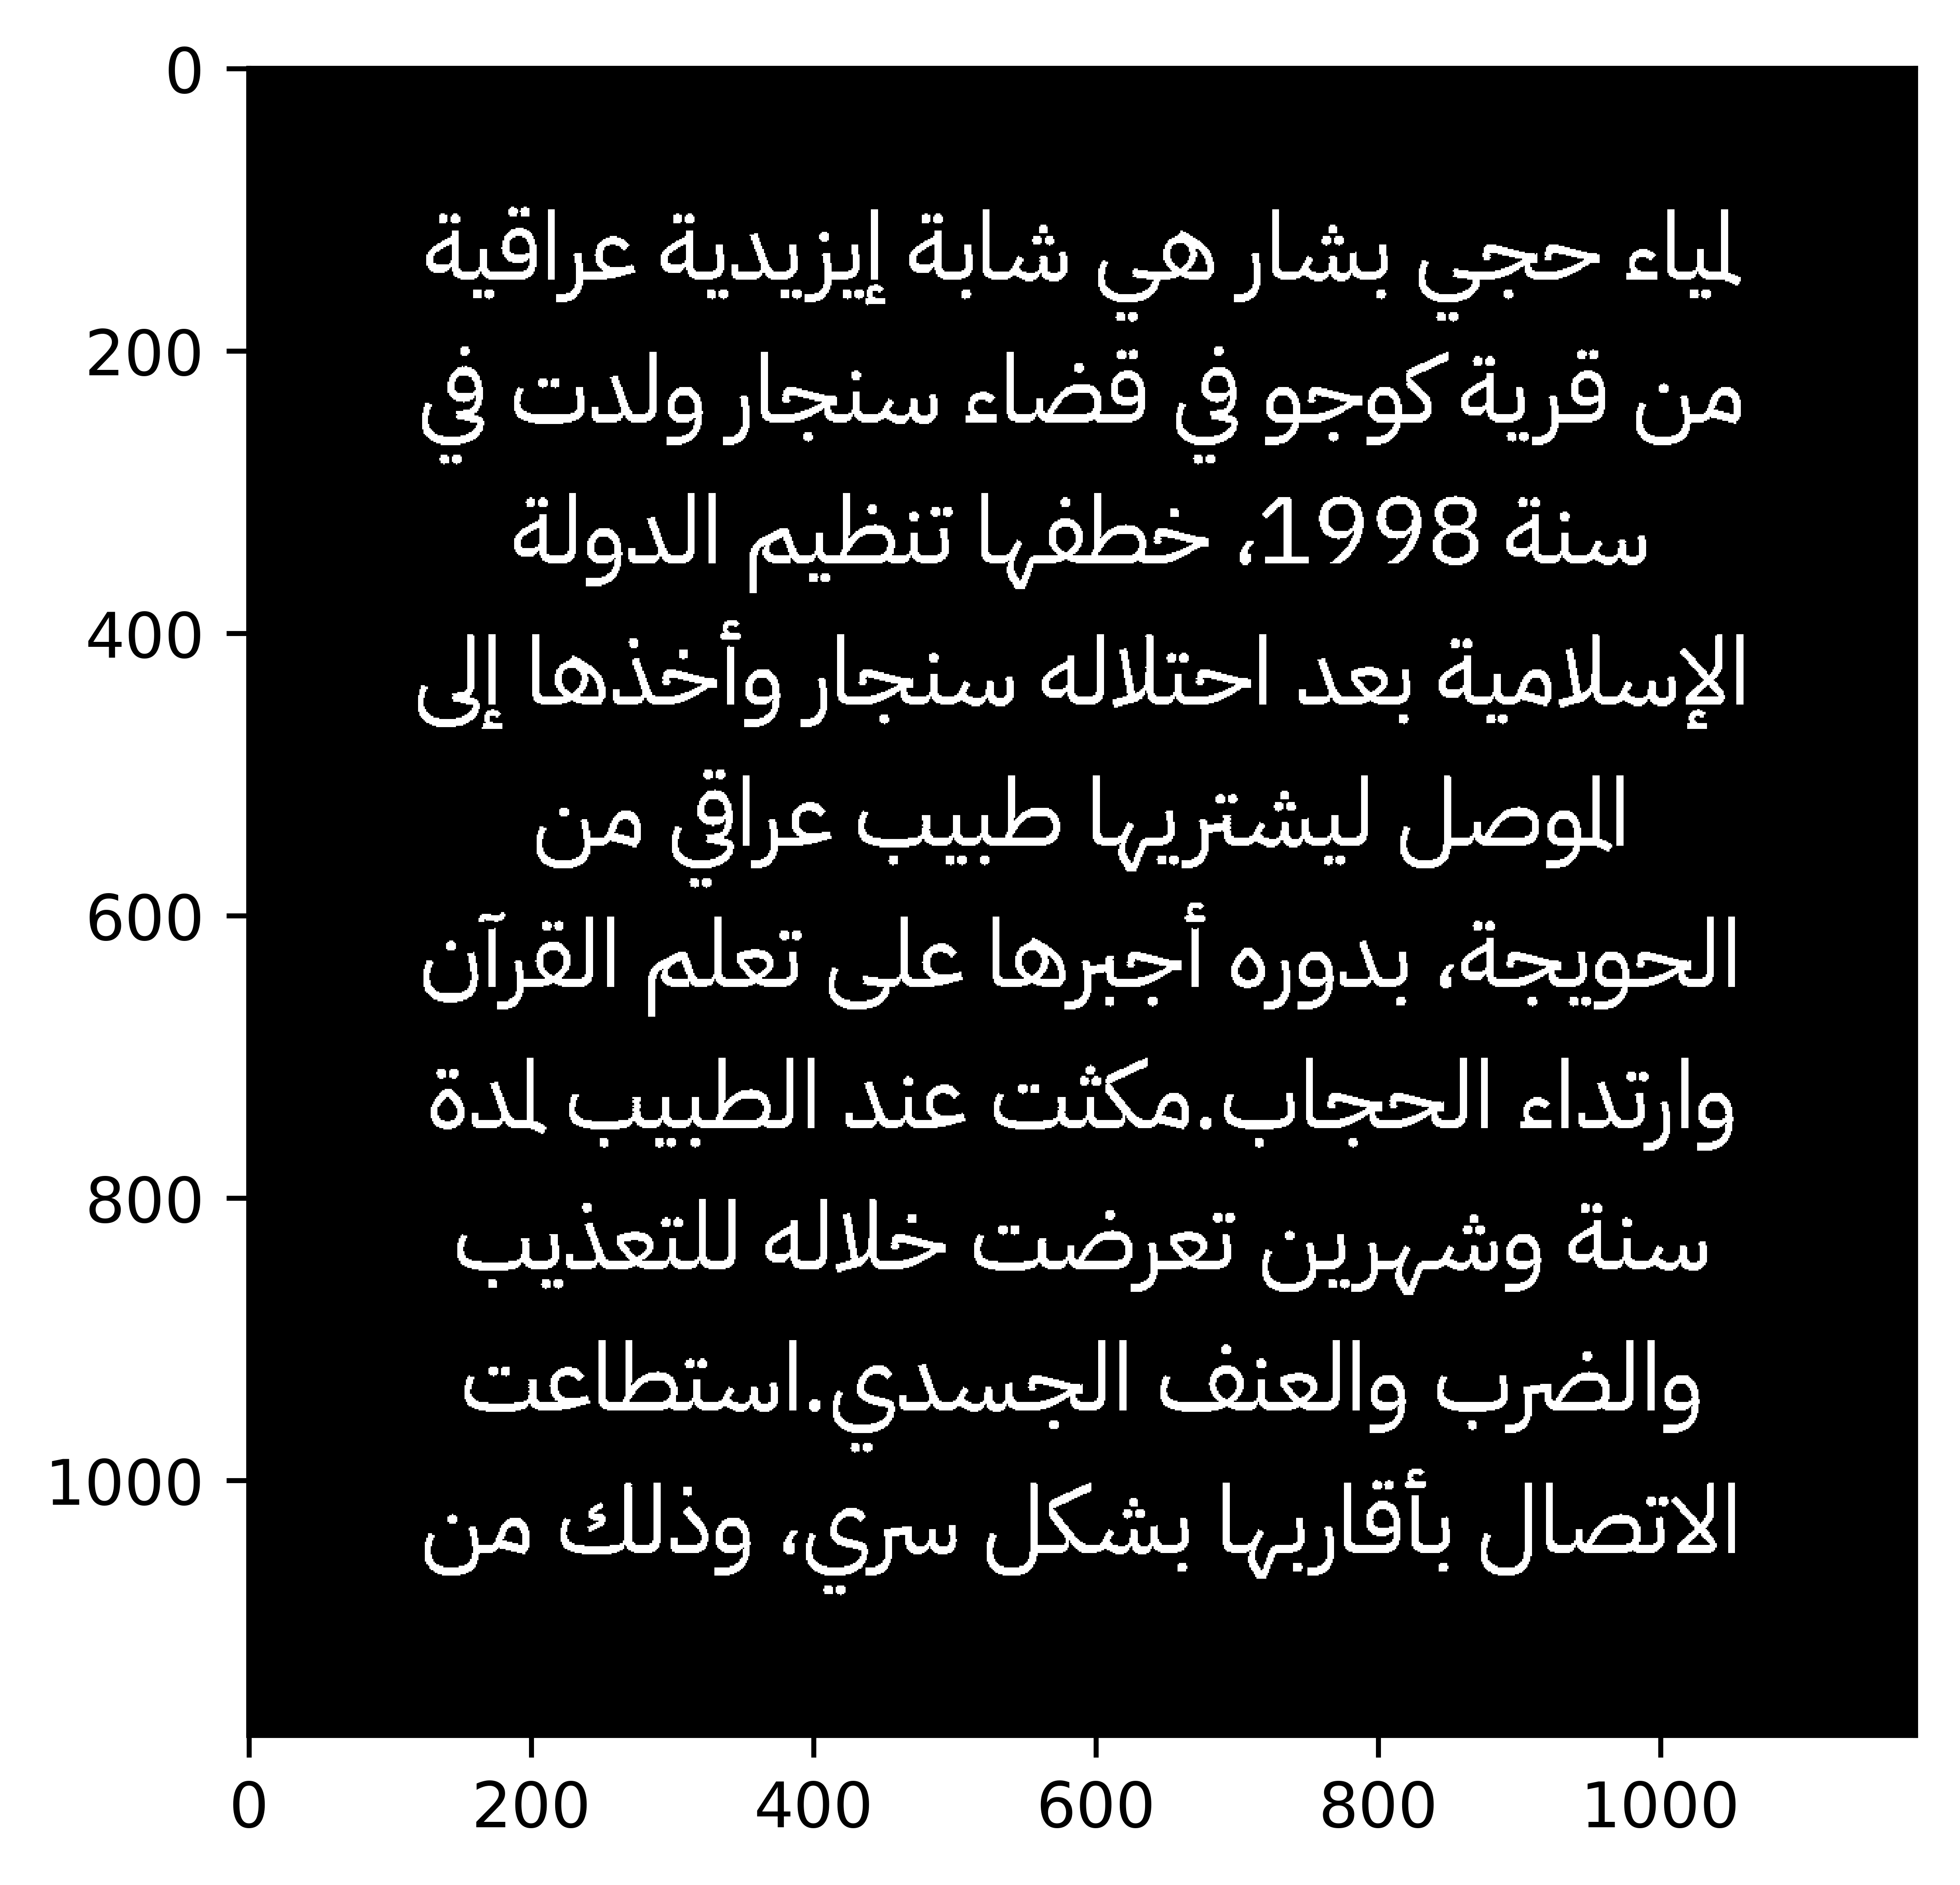

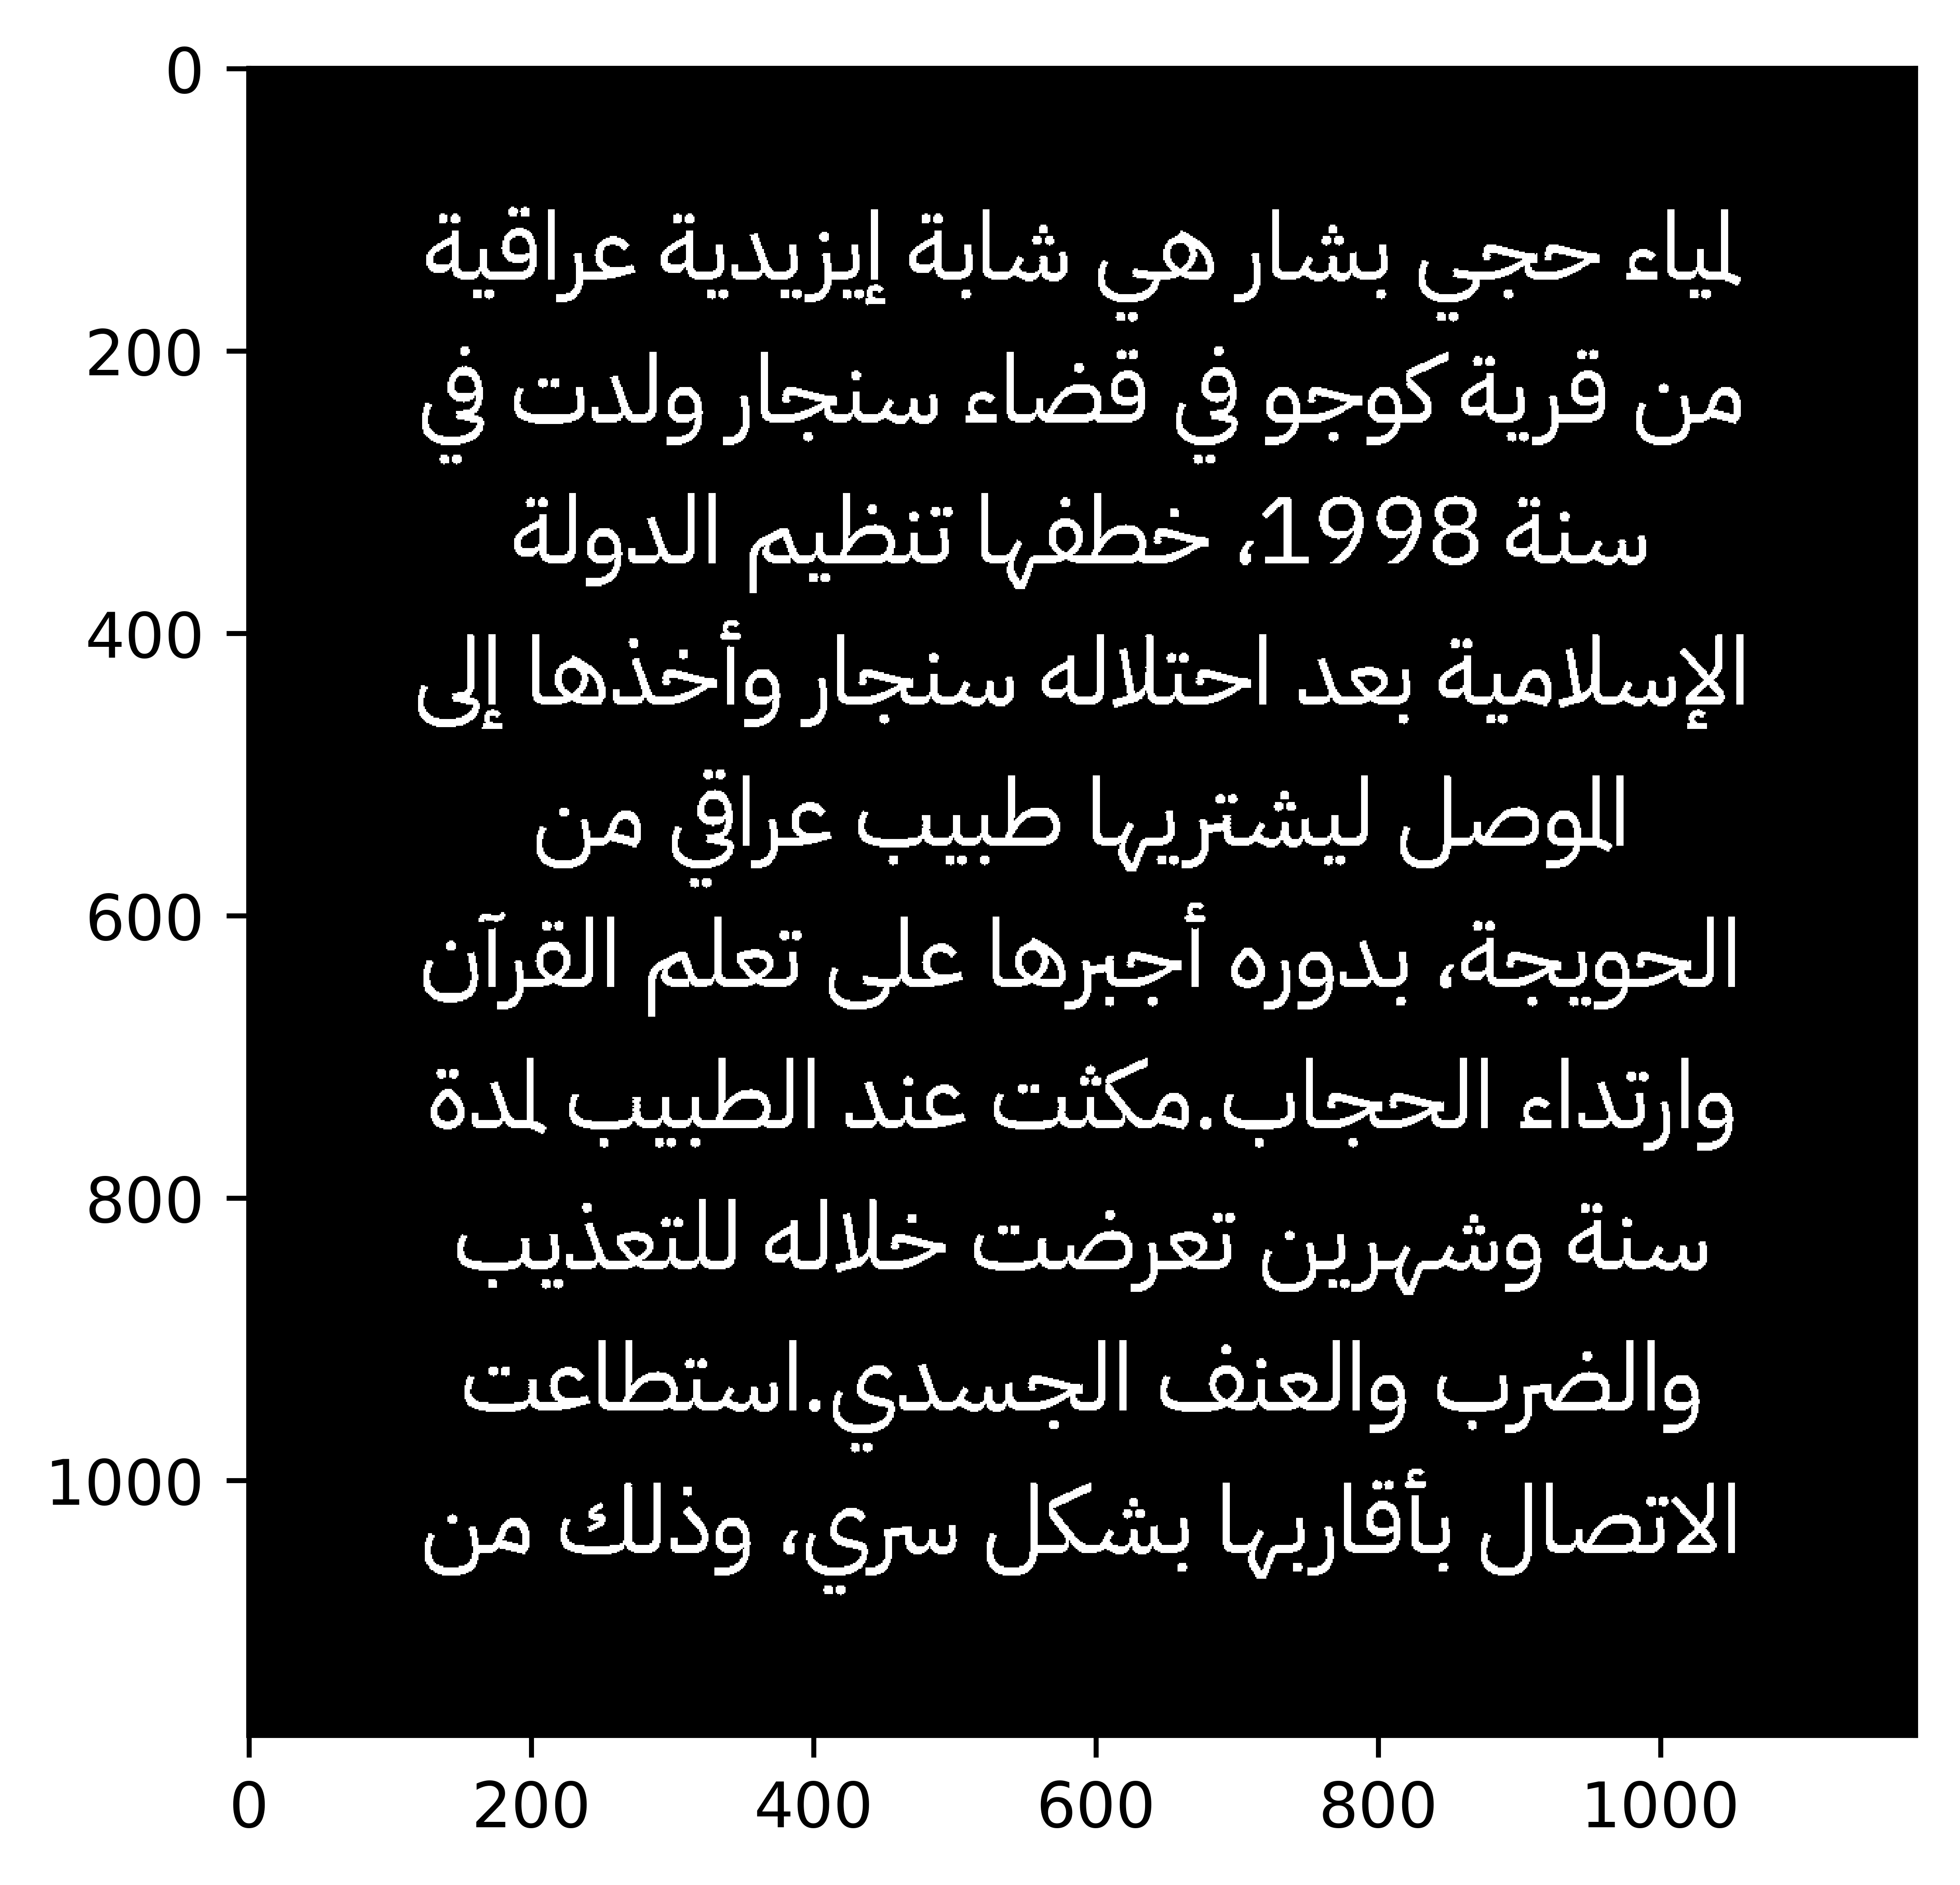

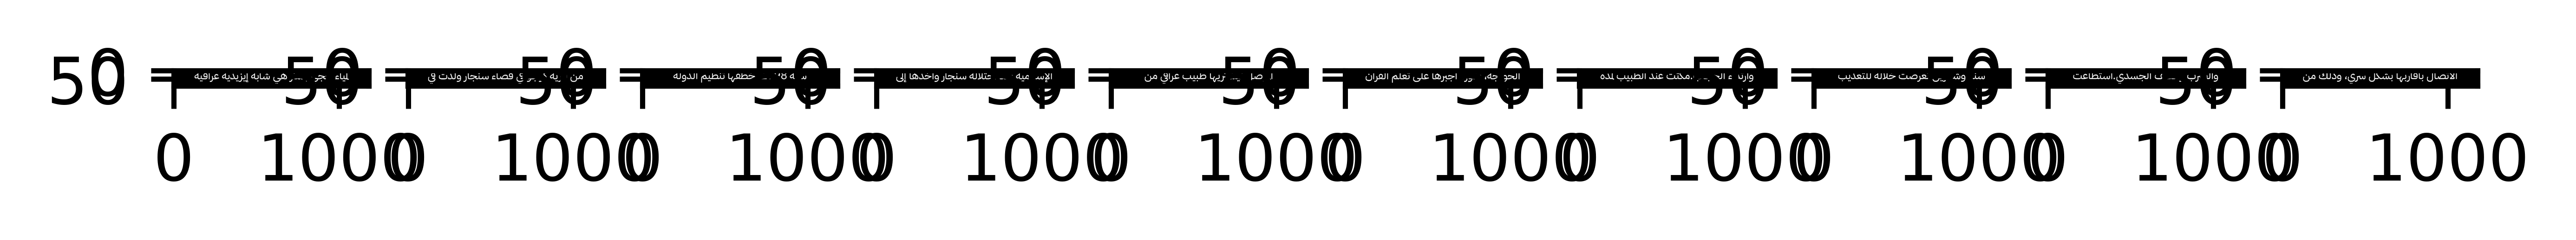

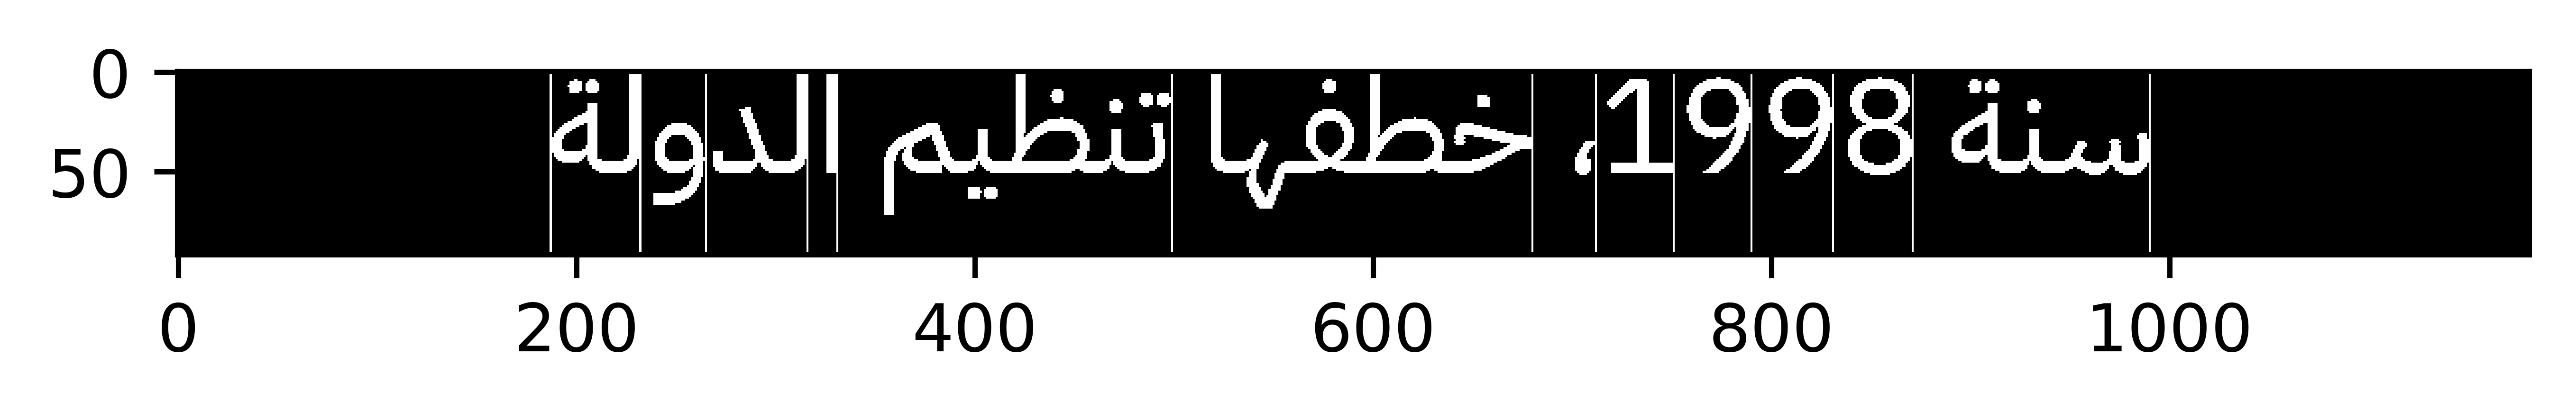

19.0 22.09090909090909
[187, 331, 499, 680, 790, 871, 990]


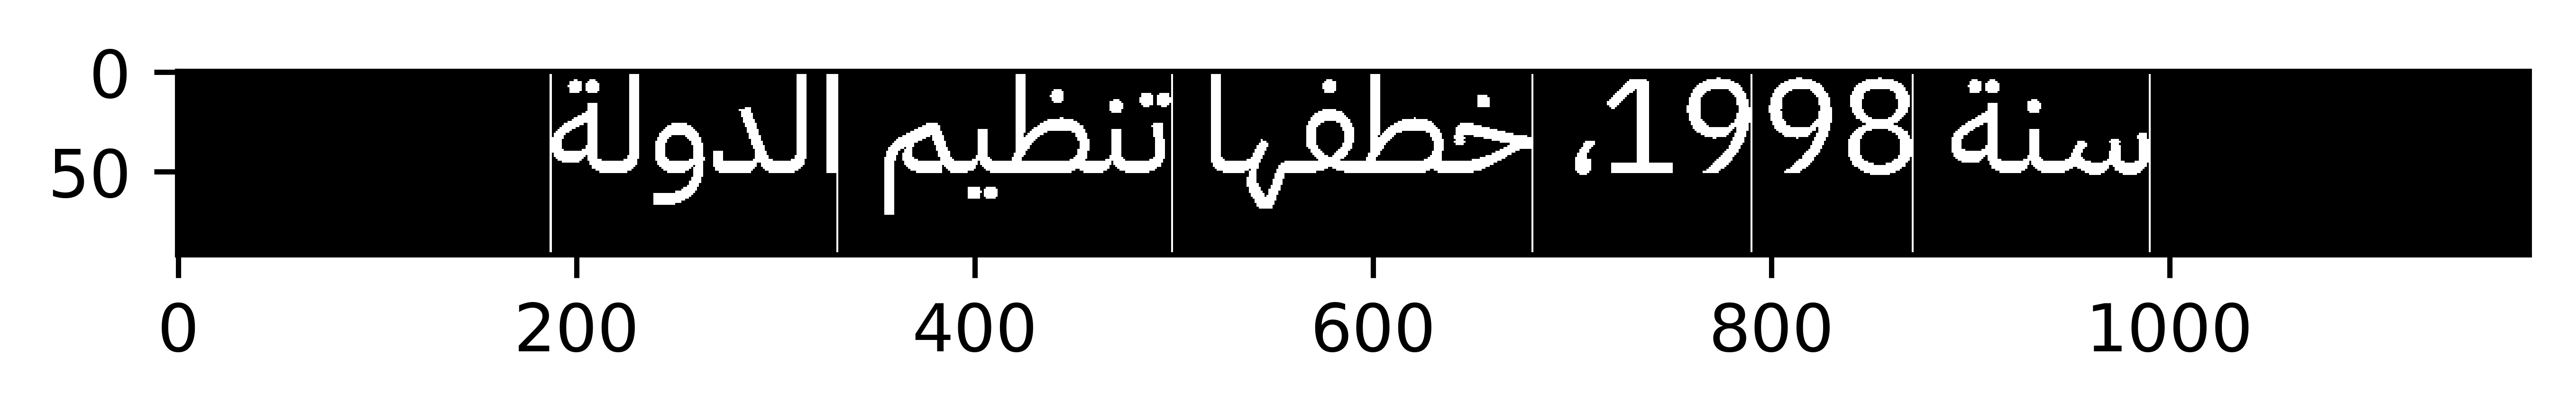

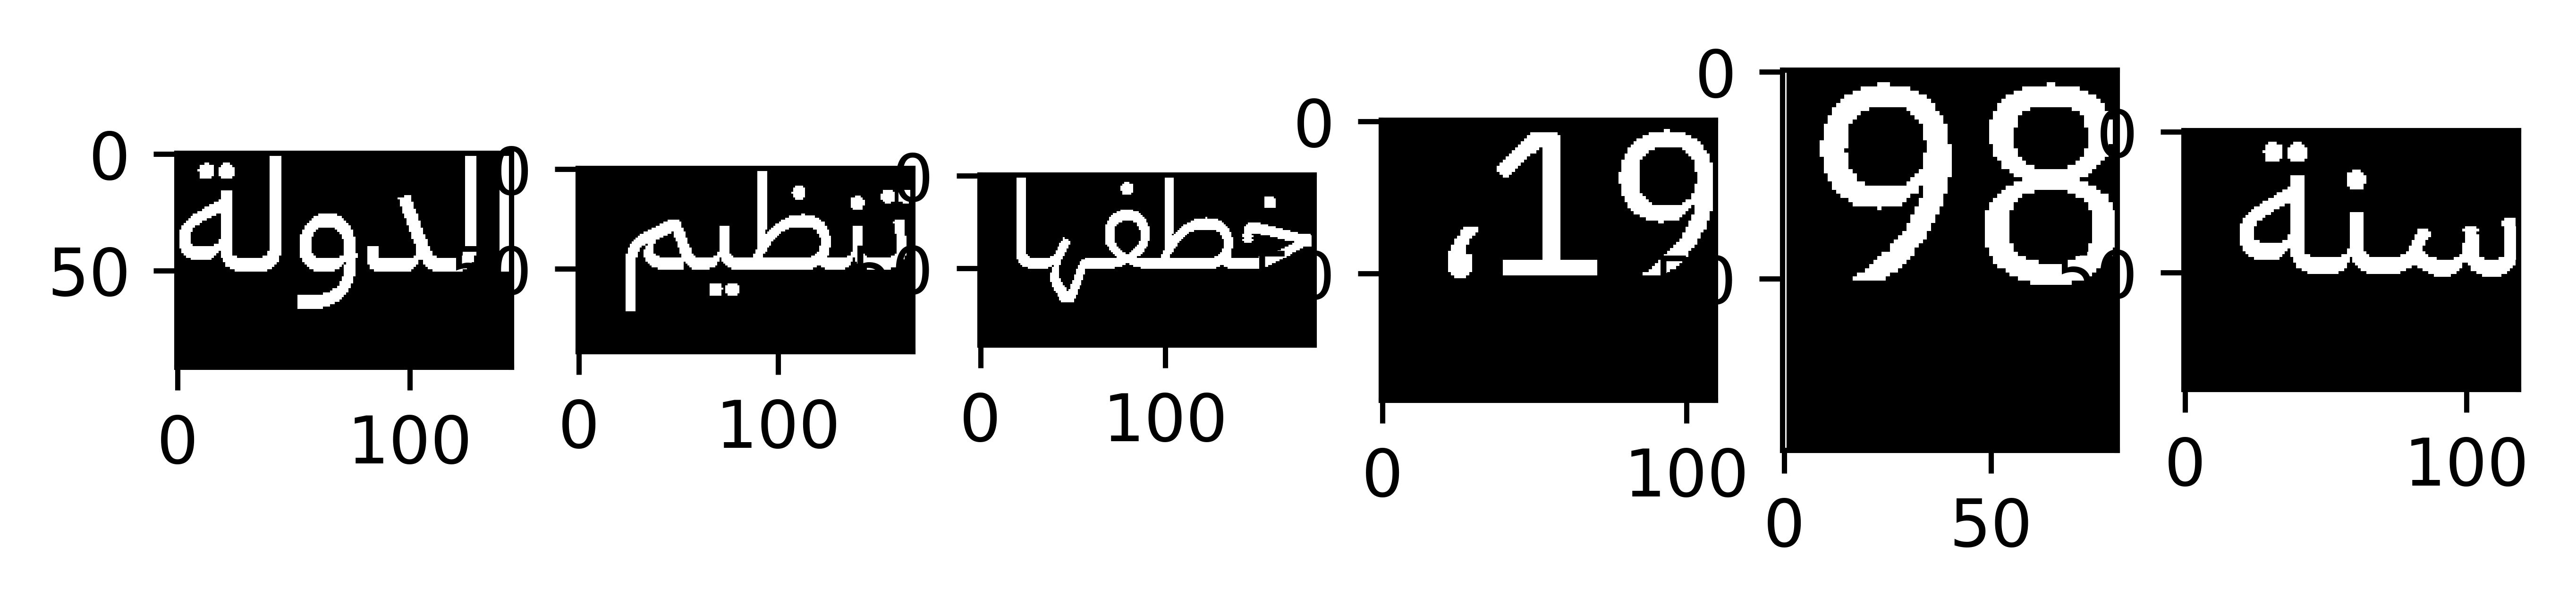

In [2]:
path = "D:\\archive\\fonts-dataset\\IBM Plex Sans Arabic\\"
image = ImageLoader.loadImage(path,"1.jpeg")
alteredImage=image
# alteredImage = NoiseRemoval.applyGaussianBlur(image=image)
# ImageLoader.print(alteredImage,sep=False)
# alteredImage = NoiseRemoval.sharpenImage(alteredImage)
alteredImage = Segmentation.segment(alteredImage)
ImageLoader.print(alteredImage)
alteredImage = OrientationDetector.rotate(alteredImage)
ImageLoader.print(alteredImage)
alteredImage = LineCutter.extractLines(alteredImage)
ImageLoader.print(alteredImage)
alteredImage = WordCutter.extractWords(alteredImage[2])
#alteredImage = CharCutter.extractCharacters(alteredImage)
# cv2.imshow("",alteredImage[0])
# cv2.waitKey(0)
#print(alteredImage)
ImageLoader.print(alteredImage)
for i in range(0,len(alteredImage)):
    alteredImage[i] = alteredImage[i].tolist()

In [3]:
#ImageLoader.print(alteredImage)
alteredImage2 = CharCutter.extractCharacters(alteredImage)
for ii in alteredImage2:
    for jj in ii:
        print(jj.StartIndex,jj.CutIndex,jj.EndIndex)
#ImageLoader.print(alteredImage2)

#ImageLoader.print(alteredImage2)
# lll = [[[1,2,3],[4,5,6],[7,8,9]],[[10,11,12],[13,14,15],[16,17,18]]]
# print(lll)

0
0
3
10
20
22
41
43
54
56
73
75
83
85
104
106
125
127
140
0
0
25
27
35
38
53
56
69
70
73
75
89
91
118
121
136
137
140
142
158
161
0
0
21
23
69
71
88
90
101
102
107
109
131
133
144
145
153
162
0
0
46
49
54
56
83
86
100
103
0
0
24
25
65
65
0
0
26
30
40
42
57
58
61
63
78
82
99
102
115
1 0 0
18 10 3
24 22 20
45 43 41
58 56 54
77 75 73
87 85 83
109 106 104
129 127 125
0 0 140
1 0 0
29 27 25
41 38 35
59 56 53
71 70 69
78 75 73
93 91 89
125 121 118
138 137 136
145 144 140
164 161 158
1 0 0
25 23 21
73 71 69
92 90 88
104 102 101
112 109 107
136 133 131
147 145 144
172 162 153
1 0 0
52 49 46
59 56 54
90 86 83
106 103 100
1 0 0
26 25 24
66 65 65
1 0 0
34 30 26
45 44 40
59 58 57
66 65 61
87 82 78
105 102 99
0 0 115


In [4]:
#print(alteredImage)